In [22]:
from PIL import Image
import numpy as np
import os

# Path to the root directory containing all folders
root_path = r'.'  # Replace with the actual path

# Dictionary to store results: {folder_name: [(image_name, pixel_sum), ...]}
results = {}

# Loop through all folders
for folder_name in range(50, 120, 5):  # Adjust range and step as per your folder names
    folder_path = os.path.join(root_path, str(folder_name))  # Get the full path of the folder
    
    if not os.path.isdir(folder_path):  # Skip if not a folder
        print(f"{folder_path} is not a directory. Skipping.")
        continue
    
    # List to store results for this folder
    folder_results = []
    
    # Loop through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tiff'):  # Process only TIFF files
            file_path = os.path.join(folder_path, file_name)
            
            try:
                # Open the image
                img = Image.open(file_path)
                
                # Convert the image to a NumPy array
                img_array = np.array(img)
                
                # Calculate the sum of pixel values
                pixel_sum = np.sum(img_array)
                
                # Store the result
                folder_results.append((file_name, pixel_sum))
            except Exception as e:
                print(f"An error occurred while processing {file_name} in {folder_name}: {e}")
    
    # Save the folder results
    results[folder_name] = folder_results

# Print the results
for folder, images in results.items():
    print(f"Folder: {folder}")
    for image_name, total in images:
        print(f"  Image: {image_name}, Pixel Sum: {total}")
    print()


.\65 is not a directory. Skipping.
.\75 is not a directory. Skipping.
.\85 is not a directory. Skipping.
.\90 is not a directory. Skipping.
.\95 is not a directory. Skipping.
.\100 is not a directory. Skipping.
Folder: 50
  Image: image1.tiff, Pixel Sum: 1971825776
  Image: image10.tiff, Pixel Sum: 1785214512
  Image: image2.tiff, Pixel Sum: 2034379616
  Image: image3.tiff, Pixel Sum: 1933434928
  Image: image4.tiff, Pixel Sum: 1831892096
  Image: image5.tiff, Pixel Sum: 1896954688
  Image: image6.tiff, Pixel Sum: 1830875680
  Image: image7.tiff, Pixel Sum: 1887316400
  Image: image8.tiff, Pixel Sum: 1905570000
  Image: image9.tiff, Pixel Sum: 1949294864

Folder: 55
  Image: image1.tiff, Pixel Sum: 2138645424
  Image: image2.tiff, Pixel Sum: 2156033040
  Image: image3.tiff, Pixel Sum: 2237806000
  Image: image4.tiff, Pixel Sum: 2157911856
  Image: image5.tiff, Pixel Sum: 2100295952
  Image: image6.tiff, Pixel Sum: 2079141184
  Image: image7.tiff, Pixel Sum: 2217920560

Folder: 60
  Ima

In [6]:
from PIL import Image
import numpy as np
import os

# Path to the root directory containing all folders
root_path = r''  # Replace with the actual path

# Dictionary to store results: {folder_name: (total_pixel_sum, image_count, average_pixel_sum)}
folder_averages = {}

# Loop through all folders
for folder_name in range(50, 120, 5):  # Adjust range and step as per your folder names
    folder_path = os.path.join(root_path, str(folder_name))  # Get the full path of the folder
    
    if not os.path.isdir(folder_path):  # Skip if not a folder
        print(f"{folder_path} is not a directory. Skipping.")
        continue
    
    # Initialize sum and count for the folder
    total_pixel_sum = 0
    image_count = 0
    
    # Loop through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tiff'):  # Process only TIFF files
            file_path = os.path.join(folder_path, file_name)
            
            try:
                # Open the image
                img = Image.open(file_path)
                
                # Convert the image to a NumPy array
                img_array = np.array(img)
                
                # Add the sum of pixel values to the total
                total_pixel_sum += np.sum(img_array)
                
                # Increment the image count
                image_count += 1
            except Exception as e:
                print(f"An error occurred while processing {file_name} in {folder_name}: {e}")
    
    # Calculate the average for the folder (if there are any images)
    average_pixel_sum = total_pixel_sum / image_count if image_count > 0 else 0
    
    # Save the results for this folder
    folder_averages[folder_name] = (total_pixel_sum, image_count, average_pixel_sum)

# Print the results
for folder, (total_sum, count, avg) in folder_averages.items():
    print(f"Folder: {folder}")
    print(f"  Total Pixel Sum: {total_sum}")
    print(f"  Image Count: {count}")
    print(f"  Average Pixel Sum: {avg:.2f}")
    print()


65 is not a directory. Skipping.
75 is not a directory. Skipping.
85 is not a directory. Skipping.
90 is not a directory. Skipping.
95 is not a directory. Skipping.
100 is not a directory. Skipping.
Folder: 50
  Total Pixel Sum: 19026758560
  Image Count: 10
  Average Pixel Sum: 1902675856.00

Folder: 55
  Total Pixel Sum: 15087754016
  Image Count: 7
  Average Pixel Sum: 2155393430.86

Folder: 60
  Total Pixel Sum: 27759890848
  Image Count: 10
  Average Pixel Sum: 2775989084.80

Folder: 70
  Total Pixel Sum: 2875917936
  Image Count: 1
  Average Pixel Sum: 2875917936.00

Folder: 80
  Total Pixel Sum: 2325881184
  Image Count: 1
  Average Pixel Sum: 2325881184.00

Folder: 105
  Total Pixel Sum: 9432636960
  Image Count: 15
  Average Pixel Sum: 628842464.00

Folder: 110
  Total Pixel Sum: 2285427136
  Image Count: 5
  Average Pixel Sum: 457085427.20

Folder: 115
  Total Pixel Sum: 6825365248
  Image Count: 11
  Average Pixel Sum: 620487749.82



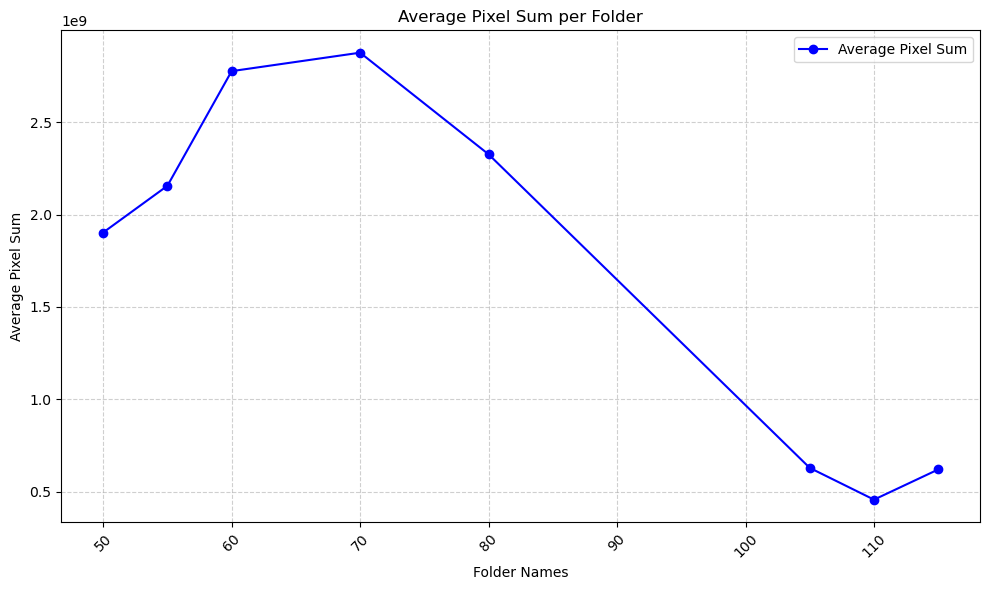

In [7]:
import matplotlib.pyplot as plt

# Extract folder names and averages from the dictionary
folders = list(folder_averages.keys())
averages = [folder_averages[folder][2] for folder in folders]  # Extract the average values

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(folders, averages, marker='o', color='blue', linestyle='-', label='Average Pixel Sum')

# Add labels and title
plt.xlabel('Folder Names')
plt.ylabel('Average Pixel Sum')
plt.title('Average Pixel Sum per Folder')

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

In [ ]:
from PIL import Image
import numpy as np
import os

# Set the root path to the current directory
root_path = '.'  # Since the script is running inside the HZDR folder

# Dictionaries to store results: {folder_name: average_pixel_sum}
averages_regular = {}  # For folders without "b"  #to store the averages
averages_b = {}  # For folders ending with "b"

# Loop through all folders
for folder_name in os.listdir(root_path):
    folder_path = os.path.join(root_path, folder_name)  # Get the full path of the folder

    if not os.path.isdir(folder_path):  # Skip if not a folder
        print(f"{folder_path} is not a directory. Skipping.")
        continue

    # Determine if the folder ends with "b"
    is_b_folder = folder_name.endswith("b")

    # Initialize variables for summing pixel values and counting images
    total_pixel_sum = 0
    image_count = 0       #to calculate the average, average = total_pixel_sum/image_count

    # Loop through all files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.tiff'):  # Process only TIFF files
            file_path = os.path.join(folder_path, file_name)   #accessing the image file

            try:
                # Open the image
                img = Image.open(file_path)

                # Convert the image to a NumPy array
                img_array = np.array(img)

                # Add the sum of pixel values to the total
                total_pixel_sum += np.sum(img_array)    #total_pixel_sum = total_pixel_sum + np.sum(img_array)

                # Increment the image count
                image_count += 1
            except Exception as e:
                print(f"An error occurred while processing {file_name} in {folder_name}: {e}")

    # Calculate the average for the folder
    average_pixel_sum = total_pixel_sum / image_count if image_count > 0 else 0

    # Store the average in the appropriate dictionary
    if is_b_folder:
        averages_b[folder_name] = average_pixel_sum
    else:
        averages_regular[folder_name] = average_pixel_sum

# Print the averages for folders without "b"
print("Averages for regular folders:")
for folder, avg in averages_regular.items():
    print(f"Folder: {folder}, Average Pixel Sum: {avg:.2f}")

# Print the averages for folders ending with "b"
print("Averages for folders ending with 'b':")
for folder, avg in averages_b.items():
    print(f"Folder: {folder}, Average Pixel Sum: {avg:.2f}")


.\deg_110.ipynb is not a directory. Skipping.
.\extinction_values.ipynb is not a directory. Skipping.
.\extinction_values.py is not a directory. Skipping.
.\images.ipynb is not a directory. Skipping.
.\images105.ipynb is not a directory. Skipping.
.\images110.ipynb is not a directory. Skipping.
.\mainimages105.ipynb is not a directory. Skipping.
.\new.ipynb is not a directory. Skipping.
.\NEWimagesplot.ipynb is not a directory. Skipping.
.\practice2.ipynb is not a directory. Skipping.
.\practice3.ipynb is not a directory. Skipping.
Averages for regular folders:
Folder: 105, Average Pixel Sum: 628842464.00
Folder: 110, Average Pixel Sum: 457085427.20
Folder: 113, Average Pixel Sum: 411284451.20
Folder: 115, Average Pixel Sum: 620487749.82
Folder: 45, Average Pixel Sum: 1541405001.60
Folder: 50, Average Pixel Sum: 1902675856.00
Folder: 55, Average Pixel Sum: 2155393430.86
Folder: 60, Average Pixel Sum: 2775989084.80
Folder: 70, Average Pixel Sum: 2875917936.00
Folder: 80, Average Pixel S

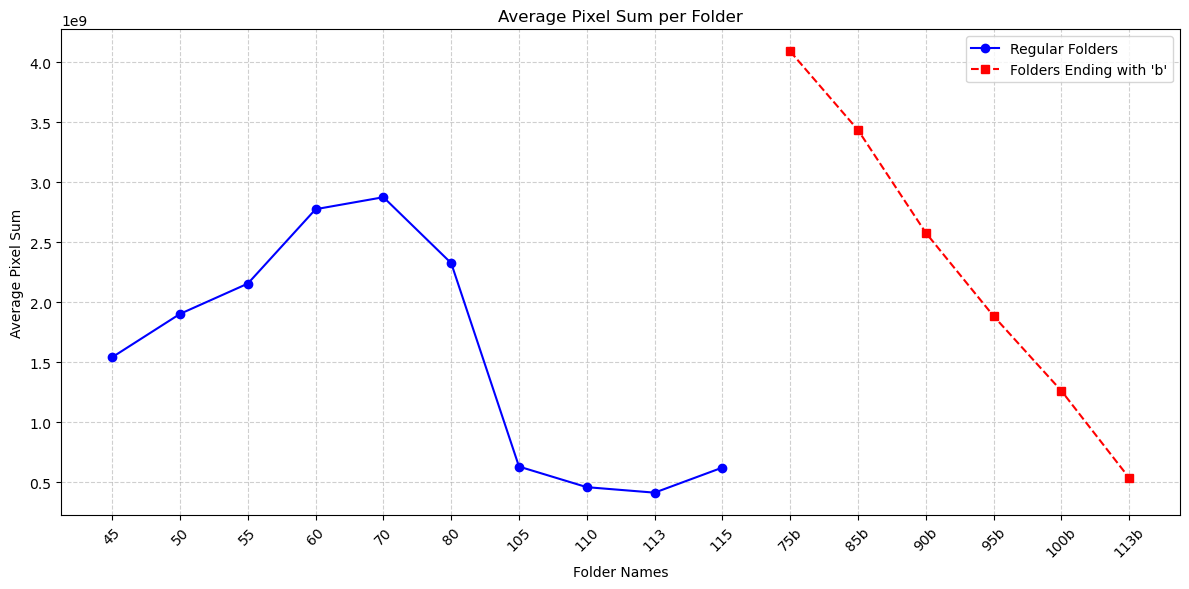

In [27]:
import matplotlib.pyplot as plt

# Extract folder names and averages for regular folders
regular_folders = list(averages_regular.keys())
regular_averages = list(averages_regular.values())

# Extract folder names and averages for folders ending with "b"
b_folders = list(averages_b.keys())
b_averages = list(averages_b.values())

# Convert folder names to integers for proper sorting and plotting
regular_folders_sorted = sorted(regular_folders, key=lambda x: int(x))
regular_averages_sorted = [averages_regular[folder] for folder in regular_folders_sorted]

b_folders_sorted = sorted(b_folders, key=lambda x: int(x.rstrip('b')))
b_averages_sorted = [averages_b[folder] for folder in b_folders_sorted]

# Plot the averages
plt.figure(figsize=(12, 6))

# Plot for regular folders
plt.plot(regular_folders_sorted, regular_averages_sorted, label="Regular Folders", marker='o', linestyle='-', color='blue')

# Plot for folders ending with "b"
plt.plot(b_folders_sorted, b_averages_sorted, label="Folders Ending with 'b'", marker='s', linestyle='--', color='red')

# Add labels, title, and legend
plt.xlabel("Folder Names")
plt.ylabel("Average Pixel Sum")
plt.title("Average Pixel Sum per Folder")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()  # Adjust layout to avoid clipping
plt.show()

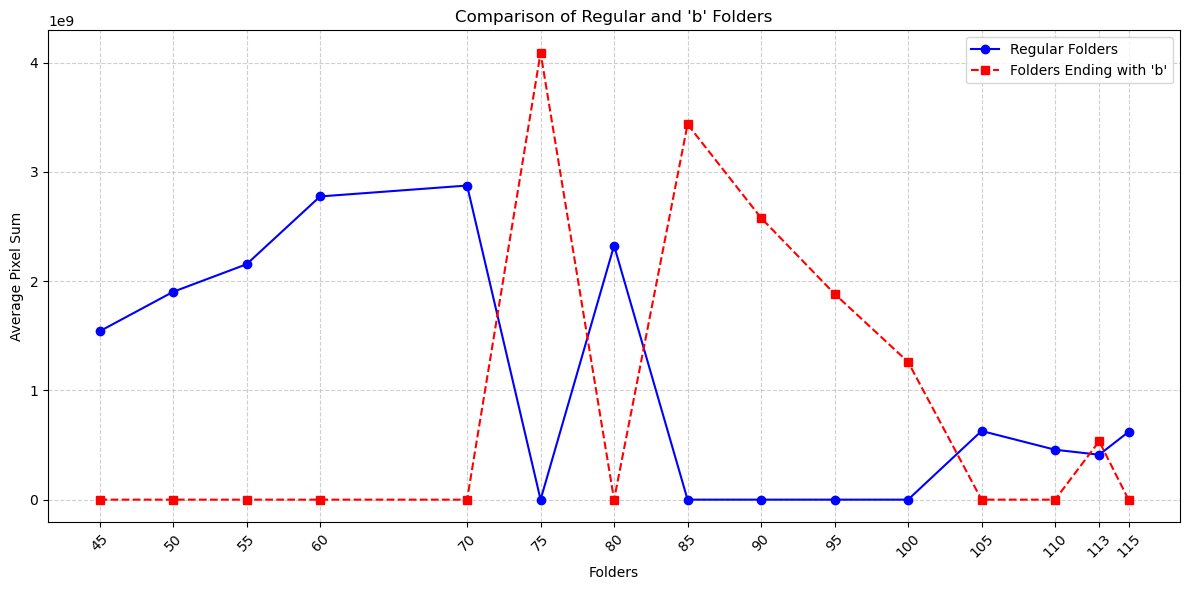

In [35]:
import matplotlib.pyplot as plt

# Get all unique folder names as integers
folders_sorted = sorted(set(int(folder) for folder in averages_regular.keys()).union(
    int(folder.rstrip('b')) for folder in averages_b.keys()))

# Initialize lists for plotting
regular_averages_grouped = []
b_averages_grouped = []

# Populate data for each folder position
for folder in folders_sorted:
    # Regular folder average (if exists)
    regular_avg = averages_regular.get(str(folder), 0)
    regular_averages_grouped.append(regular_avg)
    
    # "b" folder average (if exists)
    b_avg = averages_b.get(f"{folder}b", 0)
    b_averages_grouped.append(b_avg)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot regular folder averages
plt.plot(folders_sorted, regular_averages_grouped, label="Regular Folders", marker='o', linestyle='-', color='blue')

# Plot "b" folder averages
plt.plot(folders_sorted, b_averages_grouped, label="Folders Ending with 'b'", marker='s', linestyle='--', color='red')

# Add labels, title, and legend
plt.xlabel("Folders")
plt.ylabel("Average Pixel Sum")
plt.title("Comparison of Regular and 'b' Folders")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(folders_sorted, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


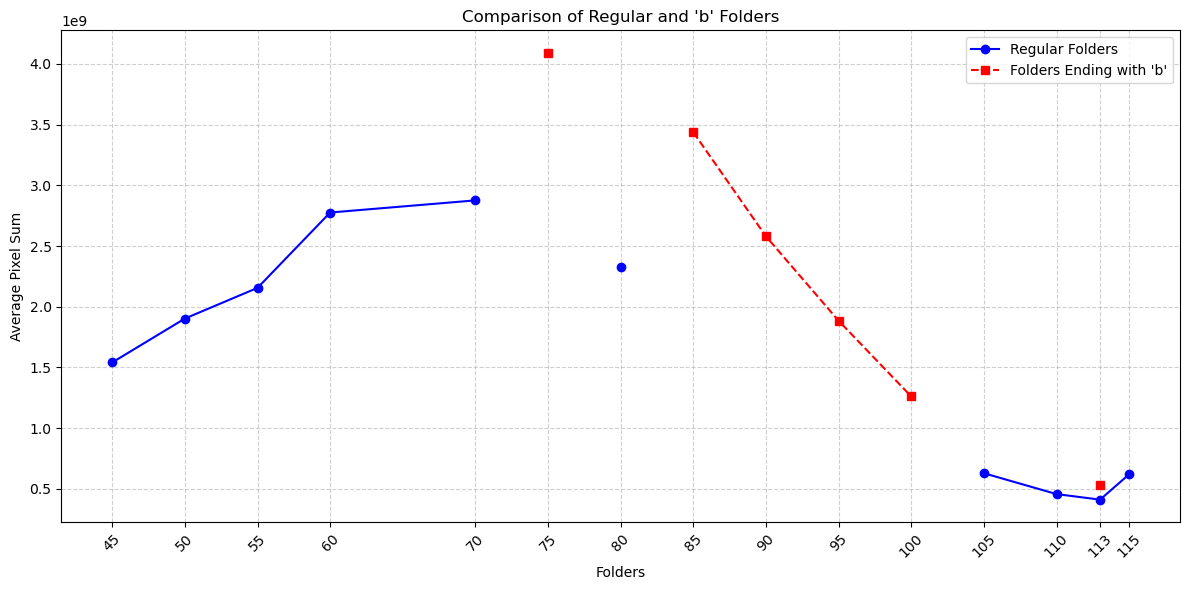

In [33]:
import matplotlib.pyplot as plt

# Get all unique folder names as integers
folders_sorted = sorted(set(int(folder) for folder in averages_regular.keys()).union(
    int(folder.rstrip('b')) for folder in averages_b.keys()))

# Initialize lists for plotting
regular_averages_grouped = []
b_averages_grouped = []

# Populate data for each folder position
for folder in folders_sorted:
    # Regular folder average (if exists)
    regular_avg = averages_regular.get(str(folder), None)
    regular_averages_grouped.append(regular_avg)
    
    # "b" folder average (if exists)
    b_avg = averages_b.get(f"{folder}b", None)
    b_averages_grouped.append(b_avg)

# Plot the data
plt.figure(figsize=(12, 6))

# Plot regular folder averages
plt.plot(folders_sorted, regular_averages_grouped, label="Regular Folders", marker='o', linestyle='-', color='blue')

# Plot "b" folder averages
plt.plot(folders_sorted, b_averages_grouped, label="Folders Ending with 'b'", marker='s', linestyle='--', color='red')

# Add labels, title, and legend
plt.xlabel("Folders")
plt.ylabel("Average Pixel Sum")
plt.title("Comparison of Regular and 'b' Folders")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# Rotate x-axis labels for better visibility
plt.xticks(folders_sorted, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()
